# Project on Machine Learning
## Overview
The aim of this project is to use data from Monte Carlo simulations of a familiar system from Statistical Mechanics, namely the Ising Model. We will use a simple model without any external magnetic field. The energy expectation value is expressed as
    $$E=-J\sum\limits^N_{\{kl\}}s_ks_l$$
The $s_k$ and $s_l$ indicate a spin. The spins are represented in a spin-lattice with $s_k=\pm 1$ and $N$ being the total number of spins. $J$ is a coupling constant representing the strength of the interaction between neighbouring pairs of spins. The $<kl>$ notation indicate sum over the nearest neighbours.

The data used and the methods explored follow closesly article [Metha et al, arXiv 1803.08823](https://arxiv.org/pdf/1803.08823.pdf) accompanied by a [Jupyter notebook](https://physics.bu.edu/~pankajm/MLnotebooks.html). The methods explored here is logistic regression, random forest algorithm and deep neural networks.

The interresting physical properties to be extracted is states above, below and around a critical temperature $T_c$. When the system is in a temperature lower than this the system is in a so-called ferromagnetic phase. When close to the critical point, the magnetization becomes smaller, while the net magnetization is zero when the temperature is above $T_c$.

## Theory
We will first present the theory for the methods mentioned.

### Linear Regression
Linear regression model is a model for fitting data-points to a linear functional form.

Given a data set 
    $$\{y_i, \boldsymbol{x}_i\}_{i=1}^n,\; i=1,\dots,n$$ 
of $n$ points with $\boldsymbol{X}$ being the $n\times m$ matrix representing the regressors. Assuming the relationship between the regressors and $y_i$ is linear, the model is
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$
with 
    $$
    \boldsymbol{y} =
        \begin{pmatrix}
            y_1 \\
            \vdots \\
            y_n
        \end{pmatrix},
    $$
    $$
    \boldsymbol{X} =
        \begin{pmatrix}
            1 & f_1\left(x_{11}\right) & \dots & f_1\left(x_{1m}\right) \\
            \vdots & \vdots & \ddots & \vdots \\
            1 & f_n\left(x_{n1}\right) & \dots & f_n\left(x_{nm}\right)
        \end{pmatrix}
    $$
and
    $$
    \boldsymbol{\beta} = 
        \begin{pmatrix}
            \beta_0 \\
            \vdots \\
            \beta_m
        \end{pmatrix}.
    $$
The vector $\boldsymbol{\varepsilon}$ is an estimate for the noise in the system(i.e variance in the Monte Carlo simulation) and $f_i$ is a pre-defined function. This can for instance be a polynomial function
    $$f_i(x) = x^i,$$
or a polynomial in sine
    $$f_i(x) = \sin(ix),$$
or any other suitable choice.

The method of linear regression is simply to minimize the $L_2$-norm with respect to parameters $\boldsymbol{\beta}$, giving the following scheme
    $$\underset{\boldsymbol{\beta}}{\text{min}}{\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2,$$
with solution
    $$\boldsymbol{\beta}_{\text{LS}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}{\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2.$$
Some differentiation yields in the following solution
    $$\boldsymbol{\beta}_{\text{LS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.$$
This optimization is known as the least-squares scheme. The $L_2$-norm is also known as the mean-squared error is the cost function in the least-squares scheme. For clarity, the cost function with the $L_2$ norm is
    $$C(\boldsymbol{X}) = \left|\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}\right|^2.$$

#### Ridge and Lasso Regression
While the linear regression model is rigorous and simple, it does have a tendency to overfit. In order to somewhat avoid this problem so-called regularization technicues have been developed. Two of these are Ridge and Lasso Regression.

##### Ridge Regression
With Ridge regression one performs an L2 regularization by adding an additional term equal to the square of the magnitude of the coefficients. This effectively ends up with performing the original linear regression, but with an added term. The equation is as follows
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \alpha\sum_{i=1}^m\beta^2_i,$$
with the scheme
    $$\boldsymbol{\beta}_{\text{Ridge}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}\left({\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}^2\right).$$
The cost is the function
    $$C(\boldsymbol{X}) = {\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}^2.$$
The factor $\alpha$ is just a scaling. This scheme is the same optimization problem as with the least-squares approach, but with a constraint $|\boldsymbol{\beta}|^2\leq t$ for some $t\geq 0$. We solve this again by differentiation with respect to $\boldsymbol{\beta}$ giving
    $$\boldsymbol{\beta}_{\text{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X} + \alpha \boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

##### Lasso Regression
The Lasso regression scheme performs an L1 regularization by adding only the absolute value of the magnitude of coefficients. The equation is
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \alpha\sum_{i=1}^m{\big|}\beta_i{\big|},$$
with $\alpha$ defined as before. The scheme is simply 
    $$\boldsymbol{\beta}_{\text{Lasso}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}\left({\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}\right).$$
The cost is
    $$C(\boldsymbol{X}) = {\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}.$$
As with the Ridge scheme this is also an optimization similar to least-squares with a constraint. The constraint in this case is $|\boldsymbol{\beta}|\leq t$ for some $t\geq 0$.

We cannot simply take the derivative in the Lasso scheme since the added regulizer is not everywhere differentiable, however since it is a convex problem the "subgradient optimally condition" can be invoked. Assuming $\boldsymbol{X}$ is orthogonal the solution is
    $$\beta^{\text{Lasso}}_j = \text{sign}\left(\beta^{\text{LS}}_j\right)\left({\big|}\beta^{\text{LS}}_j{\big|} - \alpha\right)_+$$

### Logistic Regression
As the title suggests, Logistic regression fits the data to a logistic function. A sigmoid function of the following form 
    $$f(x) = \frac{1}{1 + \exp(-\boldsymbol{x}^T\boldsymbol{w})}$$.


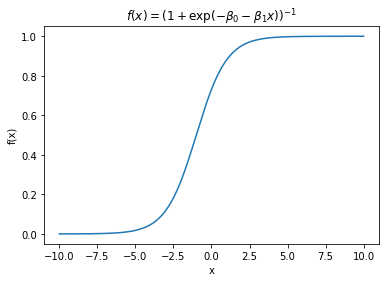

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def logisticFunction(x, b0=1, b1=1):
    """ calculate and return logistic function """
    return 1 / (1 + np.exp(-b0-b1*x))

x = np.linspace(-10,10,1000)

plt.plot(x, logisticFunction(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$f(x)=(1 + \\exp(-\\beta_0-\\beta_1x))^{-1}$")
plt.show()

The idea with the binary logistic regression is to find the probability for a stochastic variable $X$ to be part of some category $Y$, this is just a joint probability $P(Y|X)$. In terms of regression terminology $Y$ would be the response and $X$ the explanatory variable. $X$ can be a data-point and the categories can be expressed as $Y=\{0,1\}$. Since we work with data-points it is convenient to index them as
    $$X\rightarrow X_i$$
    $$Y\rightarrow Y_i=\{0,1\}$$
The probabilites can then be expressed as
    $$f(Y_i=1|\boldsymbol{X}_i,\boldsymbol{w}) = \frac{1}{1 + \exp(-\boldsymbol{X}_i^T\boldsymbol{w})}$$
    $$f(Y_i=0|\boldsymbol{X}_i,\boldsymbol{w}) = 1 - f(Y_i=1|\boldsymbol{X}_i)$$
The problem addressed is simply a dataset with points $\boldsymbol{X}_i$ and binary labels $Y_i\in\{0,1\}$. Considering drawing datapoints independently the likelihood of seing some data $D_i=\{(Y_i,\boldsymbol{X}_i)\}$ is
    $$P(D_i|\boldsymbol{w}) = \prod_{i=1}^n\left[f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right]^{Y_i} \left[1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right]^{1-Y_i},$$
and the maximum likelihood estimator(MLE) is defined as the set of parameters which maximizes the log-likelihood(log of above function). The expression for $\boldsymbol{w}$ is
    $$\boldsymbol{w}_{\text{MLE}}= \underset{\boldsymbol{w}}{\text{arg}\text{max}} \sum\limits_{i=1}^n \left[y_i\log\left(f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right) + (1 - Y_i)\log\left(1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right)\right].$$
The cost is just the negative log-likelihood and is known as the cross-entropy in statistics. The expression is
    $$C(\boldsymbol{w}) = -\sum\limits_{i=1}^n \left[Y_i\log\left(f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right) + (1 - Y_i)\log\left(1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right)\right].$$
The cross-entropy is convex by the second-derivative test(with respect to parameters $\boldsymbol{w}$) meaning a simple minimization gives the global minimum. The equation is
    $$\boldsymbol{0} = \nabla C(\boldsymbol{w}) = \sum_{i=1}^n\left[f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right) - Y_i\right]\boldsymbol{X}_i.$$
This is a transcendental equation for $\boldsymbol{w}$ which has to be solved numerically by some numerical optimization scheme such as gradient descent or some Quasi-Newton method.

### Random Forest Algorithm
A random forest is, in the context of data science, a family of randomized tree-based classifier decision trees. The basic structure of the decision tree is formed as a series of questions which partition the data. The random forest is then made by creating an ensemble of such trees with a randomization procedure, some of these are
- $\textbf{Bagging}$: Reduce variance by creating several subset of data from sample choosen in random with replacement. Each subset is then trained giving in total an ensemble of different models.
- $\textbf{Feature Bagging}$: Reduces correlations between decision trees by creating several subset of the features at each split of the tree.
- $\textbf{Extremized Random Forest}$: Prevent overfitting and reduce correllations, but reduce predictive power by combining ordinary and feature bagging with an extreme randomization procedure where the splitting is done at random instead of optimal criteria. 

### Neural Networks
A neural network is essentially just a linear transformation that weights the values of different inputs by a non-linear activation function and is a supervised learning method. The basic idea is with the so-called neuron which just represents a node (or element) in the network. Then, stack a number of these in to form a layer. The first layer is called the input and is represented by an $n\times d$ matrix
    $$\boldsymbol{x} = 
        \begin{pmatrix}
            x_{11} & \dots & x_{1d} \\
            \vdots & \ddots & \vdots \\
            x_{d1} & \dots & x_{nd}
        \end{pmatrix},$$
with the node being the elements in $\boldsymbol{x}$. A number of layers with sizes $(n_2,\dots,n_m)$ (number of nodes) are then laid between the input and the output, these are known as hidden layers. The weighting is then represented as a set of neuron-specific matrices
    $$\{\boldsymbol{w}\}^m_{l=1} = \left(\boldsymbol{w}^{(1)},\dots,\boldsymbol{w}^{(m)}\right).$$
The transformation in layer $l$ is then specified by $\boldsymbol{w}^{(l)}$ and the output serves as the input to the next layer. The last transformation gives the output. It is also common to introduce a bias $b^{(l)}$ meaning the transformation $z^{(l)}$ for layer $l$ is actually
    $$z^{(l)} = \boldsymbol{w}^{(l)}\cdot \boldsymbol{x} + b^{(l)}$$

The shape of $\boldsymbol{w}^{(l)}$ is determined by the layer. $\boldsymbol{w}^{(1)}$ is a $(d\times n_1)$ matrix where $n_i$ is the number of nodes in the first hidden layer and $\boldsymbol{w}^{(2)}$ has shape $n_1\times n_2$ and so on. In general the shape of $\boldsymbol{w}^{(i)}$ is $n_i \times n_{i+1}$ where $n_1=d$. 

With the neural-network model at hand the weights and the biases have to be determined. The procedure is the same as previously, define the cost function and minimize. We may write that given the data-point $(\boldsymbol{x}_i, y_i)$ the neural network makes a prediction $\hat{y}_i(\boldsymbol{w},\boldsymbol{b})$.

#### Backpropagation
In order to actually minimize the cost function a so-called backpropagation has to be made. Assuming our neural-network has
- $L$:            Number of layers
- $w^l_{jk}$:     Weight for $k$-th neuron in layer $l-1$ to $j$-th neuron in layer $l$
- $b^l_j$:        Bias of neuron $j$ in layer $l$
- $a^l_j$:        Activation of neuron $j$ in layer $l$

The activation is related by the non-linear transformation $\sigma$
    $$a^l_j = \sigma\left(\sum_k w^l_{kj}a^{l-1}_k\right).$$
We define two new quantities, the linear weigthed sum
    $$z^l_j = \sum_kw^l_{jk}a^{l-1}_k + b^l_j$$
and the error of neuron $j$
    $$\Delta^L_j = \frac{\partial E}{\partial z^L_j}.$$
The error of neuron $j$ in layer $l$ is equivalently
    $$\Delta^l_j = \frac{\partial E}{\partial z^l_j} = \frac{\partial E}{\partial a^l_j}\frac{\partial \sigma}{\partial z^l_j},$$
by the chain rule. The error terms can also be expressed as
    $$\Delta^l_j = \frac{\partial E}{\partial z^l_j} = \frac{\partial E}{\partial b^l_j}\frac{\partial b^l_j}{\partial z^l_j} = \frac{\partial E}{\partial b^l_j},$$
since
    $$\frac{\partial b^l_j}{\partial z^l_j} = 1.$$
The activation transformation can be expressed with $z^l_j$ as
    $$a^l_j = \sigma\left(z^l_j\right).$$
A third expression of the error is
    $$\Delta^L_j = \frac{\partial E}{\partial z^l_j} = \sum_k \frac{\partial E}{\partial z^{l+1}_k}\frac{\partial z^{l+1}_k}{\partial z^l_j} = \sum_k \Delta^{l+1}_k\frac{\partial z^{l+1}_k}{\partial z^l_j} = \left(\sum_k\Delta^{l+1}_kw^{l+1}_{kj}\right)\frac{\partial \sigma}{\partial z^l_j}.$$
The final expression involved is the derivative with respect to $w^l_{jk}$,
    $$\frac{\partial E}{\partial w^l_{jk}} = \frac{\partial E}{\partial z^l_j}\frac{\partial z^l_j}{\partial w^l_{jk}} = \Delta^l_ja^{l-1}_k.$$

Combining these algorithms the backpropagation algorithm is
1. $\textbf{Activation at input layer}$: Calculate activations $a^l_j$ of all neurons in the input layer.
2. $\textbf{Feedforward}$: Compute $z^l$ and $a^l$ for all subsequent layers.
3. $\textbf{Error at output}$: Calculate error in output layer with first expression for $\Delta^l_j$.
4. $\textbf{Backpropagate}$: Use third expression for $\Delta^l_j$ to calculate $\Delta^l_j$ for all layers.
5. $\textbf{Calculate Gradient}$: Calculate $\frac{\partial E}{\partial b^l_j}$ and $\frac{\partial E}{\partial w^l_{jk}}$.

With the efficient forward sweep through the network and one backpropagation the gradient is readily calculated and the minimization can be done with the same methods as with the logistic regression scheme.

#### Cost function
We have yet to mention the actual cost function with the neural network. These are the same as introduced with the linear regression schemes, that is either the mean-square error
    $$E(\boldsymbol{w},\boldsymbol{b}) = \frac{1}{N}\sum_i\left(y_i - \hat{y}_i(\boldsymbol{w},\boldsymbol{b})\right)^2,$$
and the mean absolute error($L_1$-norm)
    $$E(\boldsymbol{w},\boldsymbol{b}) = \frac{1}{N}\sum_i\left|y_i - \hat{y}_i(\boldsymbol{w},\boldsymbol{b})\right|.$$
The cross-entropy 
    $$C(\boldsymbol{w}) = -\sum\limits_{i=1}^n \left[y_i\log\left(\hat{y}_i(\boldsymbol{w})\right) + (1 - y_i)\log\left(1 - \hat{y}_i(\boldsymbol{w})\right)\right].$$
can still be used if the data is categorical. More generally if $y$ can take more values, $y\in{0,1,\dots,M-1}$, we may define
    $$y_{im} = \left\{\begin{matrix}
        1,& y_i = m \\
        0,& \text{else}
    \end{matrix}\right.,$$
and the categorical cross-entropy is
    $$E(\boldsymbol{w}) = -\sum_{i=1}^n \sum_{m=0}^{M-1}\left(y_{im} \log\left(\hat{y}_{im}(\boldsymbol{w})\right) + (1 - y_{im} \log\left(1 - \hat{y}_{im}(\boldsymbol{w})\right)\right).$$
Depending on the data one of these cost functions can be used in the backpropagation algorithm and the training can proceed.

## Implementation and Results
### Estimating the Coupling Constant of the 1D Ising Model
In estimating the coupling constant we use data generated with $J=1$ and use the linear regression schemes presented.

In order to use linear regression with the Ising model we assume the model (without any prior knowledge) the all-to-all Ising model
    $$E^{(i)} = -\sum\limits_{kl}^NJ_{kl}s^{(i)}_ks^{(i)}_l,$$
with the $J_{kl}$ being the coupling strengths we wish to learn. The index $i$ represents a sample point. This equation can be rewritten as the matrix equation
    $$E^{(i)} = -\boldsymbol{X}^{(i)} \cdot \boldsymbol{J},$$
with $\boldsymbol{X}^{(i)}$ representing the two-body interactions 
    $$\left\{s^{(i)}_k,s^{(i)}_l\right\}_{k,l=1}^N.$$
This is the exact linear regression presented earlier.

Let us first generate $N=10000$ states of a system of length $L=40$ and divide the data into a training set and test set. This is to test the performance of the algorithm on a set it has not seen before (hence the test set). 

In [66]:
import numpy as np
import scipy.sparse as sp

np.random.seed(17)

def ising_energies(states, L):
    """ Calculate energy """
    J = np.zeros((L,L),)
    for i in range(L):
        J[i, (i+1)%L] -= 1.0
    # end for
    
    return np.einsum('...i,ij,...j->...', states, J, states)
# end function ising_energies

L= 40 # system size
N = 10000 # number of states

# generate Ising states
states = np.random.choice([-1,1], size=(N, L))

energies = ising_energies(states, L)

# reshape states into a single index (i,j) --> p
states = np.einsum('...i,...j->...ij', states, states)
shape = states.shape
states = states.reshape((shape[0], shape[1]*shape[2]))

# build final set
data = [states, energies]

n_samples = 400 # number of samples

# define training and test data
X_train=data[0][:n_samples]
Y_train=data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=data[0][n_samples:3*n_samples//2]
Y_test=data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

Now we can start to apply the least-squares, ridge regression and LASSO methods using the scikit-learn package.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


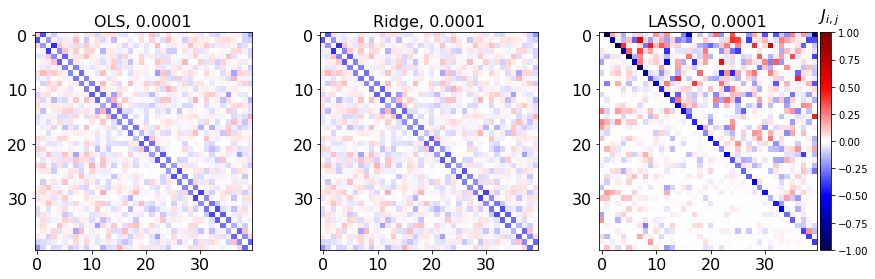

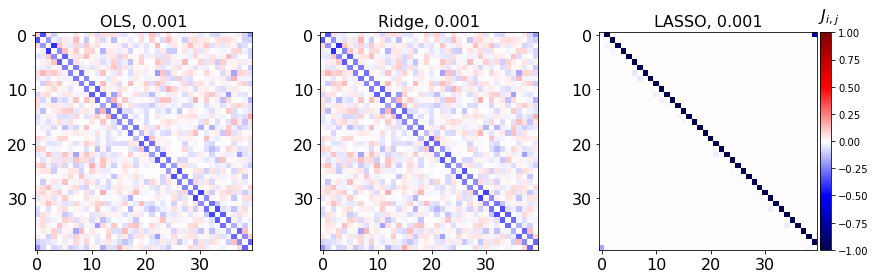

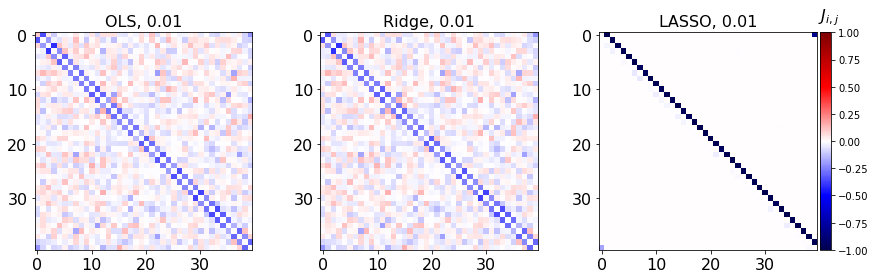

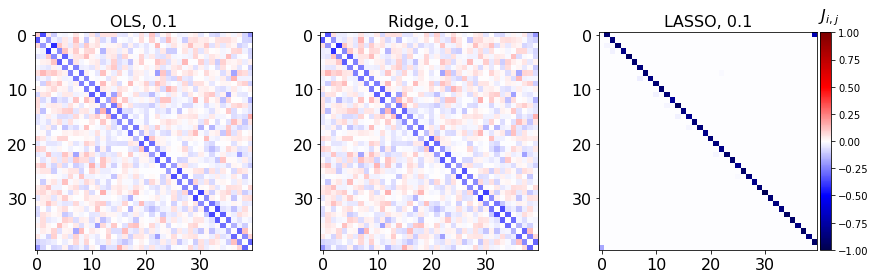

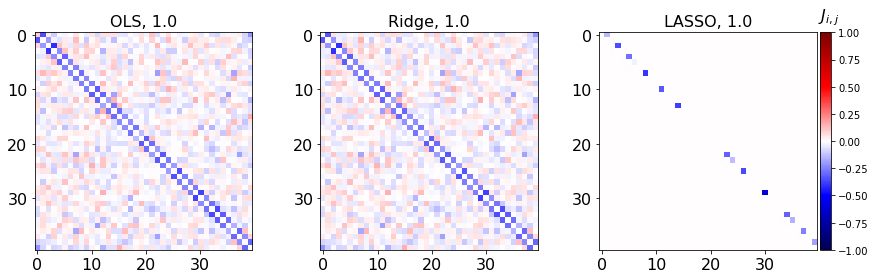

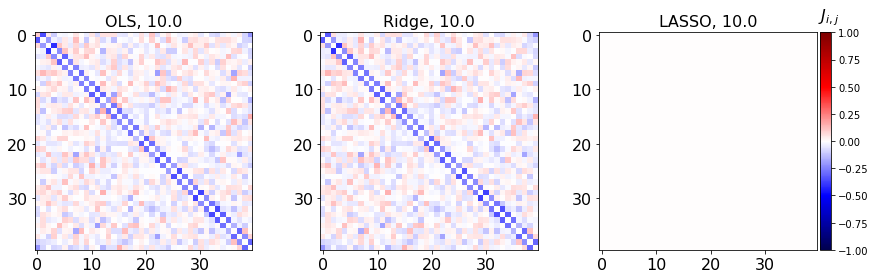

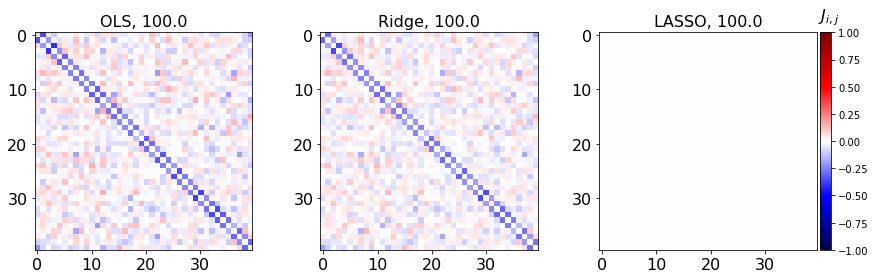

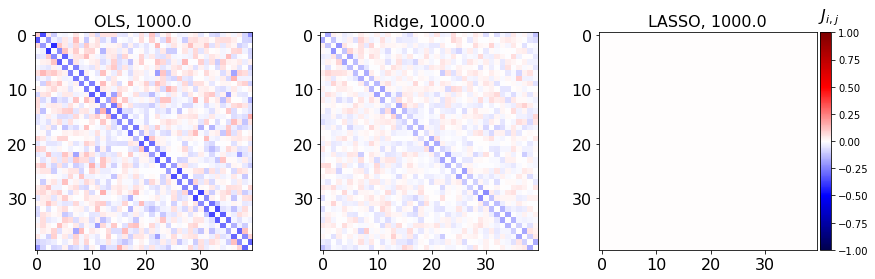

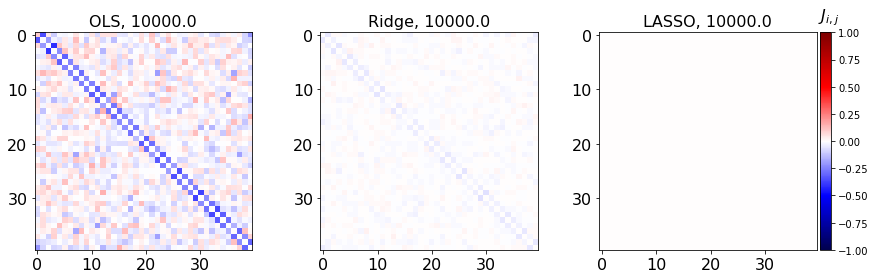

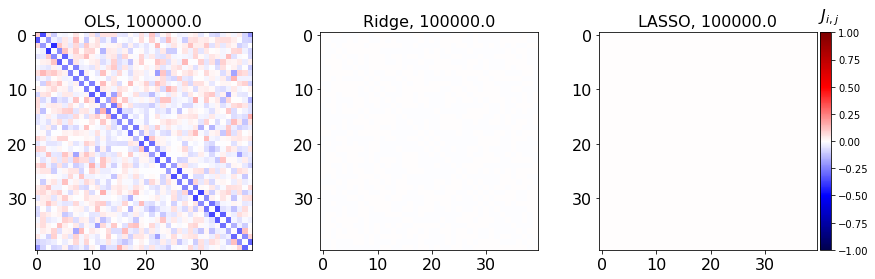

In [68]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_plot(coefs, L, lamdas, titles=['OLS', 'Ridge', 'LASSO']):
    """ plot results """
      
    cmap_args = dict(vmin=-1., vmax=1., cmap='seismic')
    for l,lamda in enumerate(lamdas):
        fig, ax = plt.subplots(nrows=1, ncols=len(coefs))
        for i,coeff in enumerate(coefs):
            J = np.array(coeff[l]).reshape((L,L))
            im = ax[i].imshow(J, **cmap_args)
            ax[i].set_title(titles[i] + ", " + str(lamda), fontsize=16)
            ax[i].tick_params(labelsize=16)
        # end forl
          
        divider = make_axes_locatable(ax[2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(im, cax=cax)
    
        cbar.set_label('$J_{i,j}$', labelpad=-40, y=1.12, fontsize=16, rotation=0)
        fig.subplots_adjust(right=2.0)
    # end fori
      
    plt.show()
# end function make_plot

def apply_method(model, x_train, y_train, x_test, y_test, lamda=None):
    """ apply model, return weights and performance score """
    
    # set regularization parameter if given
    if lamda:
        model.set_params(alpha=lamda)
    # end if
    
    # run fitting and store weights
    model.fit(x_train, y_train)
    
    return model.coef_, model.score(x_train, y_train), model.score(x_test, y_test)
# end function apply_method

def grab_axis(nested_list, j=0):
    """ slice list and return axis j """
    return [[i[j] for i in r] for r in nested_list]
# end function grab_axis_i

# list for results
results = []

# regularization parameters
lamdas = np.logspace(-4,5,10)

least_squares_results = apply_method(linear_model.LinearRegression(), X_train, Y_train, X_test, Y_test)
results.append([least_squares_results for r in range(len(lamdas))])

for rl in [linear_model.Ridge(), linear_model.Lasso()]:
    tmp_res = []
    for lamda in lamdas:
        tmp_res.append(apply_method(rl, X_train, Y_train, X_test, Y_test, lamda))
    # end for lamda
    results.append(tmp_res)
# end for rl

make_plot(grab_axis(results,0), L, lamdas)

In order to actually see the performance we plot the training and test errors.

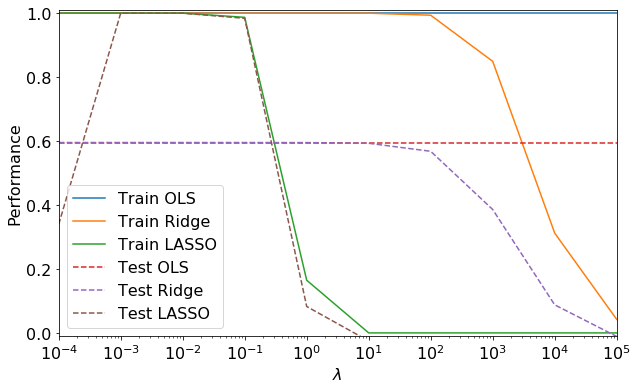

In [67]:
def plot_errors(train_errors, test_errors, lamdas, titles=["OLS", "Ridge", "LASSO"]):
    """ plot in-sample and out-of-sample errors, aka performance"""
    for i,trnerr in enumerate(train_errors):
        plt.semilogx(lamdas, trnerr, label="Train " + titles[i])
    # end fori
    
    for i,tsterr in enumerate(test_errors):
        plt.semilogx(lamdas, tsterr, '--', label="Test " + titles[i])
    # end fori
    
    fig = plt.gcf()
    fig.set_size_inches(10.0, 6.0)
    
    plt.legend(loc='lower left',fontsize=16)
    plt.ylim([-0.01, 1.01])
    plt.xlim([min(lamdas), max(lamdas)])
    plt.xlabel(r'$\lambda$',fontsize=16)
    plt.ylabel('Performance',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()
# end function plot_errors

plot_errors(grab_axis(results, 1), grab_axis(results, 2), lamdas)